# 230968126 Week 5

Name :- Kewal Thacker, Section A, Batch 1

EXERCISE 1 – Business Analytics Perform analysis on the NORTHWIND (COMBINED) data set using the pivot tables and charts in MS Excel.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx",sheet_name='Products')

In [4]:
df

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,False
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,False
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...
72,73,Röd Kaviar,17,8,24 - 150 g jars,15.00,101,0,5,False
73,74,Longlife Tofu,4,7,5 kg pkg.,10.00,4,20,5,False
74,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,False
75,76,Lakkalikööri,23,1,500 ml,18.00,57,0,20,False


## 1. Identify the top 5 and bottom 5 selling products in the company.

In [5]:
import pandas as pd
df_orders = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Orders')
df_order_details = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Order Details')
df_products = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Products')
df_combined = pd.merge(df_order_details, df_orders, on='OrderID')
df_combined = pd.merge(df_combined, df_products, on='ProductID')

df_combined['TotalSales'] = df_combined['UnitPrice_x'] * df_combined['Quantity']

total_sales_by_product = df_combined.groupby('ProductName')['TotalSales'].sum()

top_5_products = total_sales_by_product.nlargest(5)
bottom_5_products = total_sales_by_product.nsmallest(5)

print("Top 5 Selling Products:")
print(top_5_products)

print("\nBottom 5 Selling Products:")
print(bottom_5_products)


The top 5 selling products are
0     60
70     4
10     4
40     3
30     1
Name: UnitsOnOrder, dtype: int64
The bottom  5 selling products are
0     60
70     4
10     4
40     3
30     1
Name: UnitsOnOrder, dtype: int64


## 2. Identify the top 5 selling products and the salesmen who sell them.


In [51]:
import pandas as pd
df_orders = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Orders')
df_order_details = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Order Details')
df_products = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Products')
df_combined = pd.merge(df_combined, df_orders[['OrderID', 'EmployeeID']], on='OrderID')

sales_by_product_employee = df_combined.groupby(['ProductName', 'EmployeeID'])['TotalSales'].sum().reset_index()


top_5_products = sales_by_product_employee.groupby('ProductName')['TotalSales'].sum().nlargest(5).index
top_5_salesmen = sales_by_product_employee[sales_by_product_employee['ProductName'].isin(top_5_products)]

print("Top 5 Selling Products and Salesmen Who Sell Them:")
print(top_5_salesmen)


Top 5 Selling Products and Salesmen Who Sell Them:
                 ProductName  EmployeeID  TotalSales
24         Camembert Pierrot           1     9125.60
25         Camembert Pierrot           2     6324.00
26         Camembert Pierrot           3    12036.00
27         Camembert Pierrot           4    10159.20
28         Camembert Pierrot           5     4896.00
29         Camembert Pierrot           6      850.00
30         Camembert Pierrot           7     2448.00
31         Camembert Pierrot           8     2951.20
32         Camembert Pierrot           9     1496.00
85             Côte de Blaye           1    23978.50
86             Côte de Blaye           2    26086.50
87             Côte de Blaye           3    25559.50
88             Côte de Blaye           4    30039.00
89             Côte de Blaye           5     8432.00
90             Côte de Blaye           7    20869.20
91             Côte de Blaye           9    15019.50
386     Raclette Courdavault           1     541

## 3. Tabulate the total sales of each product, ship country wise.

In [38]:
import pandas as pd
df_orders = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Orders')
df_order_details = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Order Details')
df_products = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Products')

df_order_details_combined = pd.merge(df_order_details, df_orders, on='OrderID')

df_combined = pd.merge(df_order_details_combined, df_products, on='ProductID')

print("Combined DataFrame columns:", df_combined.columns)

print("\nCombined DataFrame sample rows:")
print(df_combined.head())

df_combined['TotalSales'] = df_combined['UnitPrice_x'] * df_combined['Quantity']

sales_by_country_product = df_combined.groupby(['ProductName', 'ShipCountry'])['TotalSales'].sum().unstack(fill_value=0)

print("\nTotal Sales of Each Product, Ship Country Wise:")
print(sales_by_country_product)


Combined DataFrame columns: Index(['OrderID', 'ProductID', 'UnitPrice_x', 'Quantity', 'Discount',
       'CustomerID', 'EmployeeID', 'OrderDate', 'RequiredDate', 'ShippedDate',
       'ShipVia', 'Freight', 'ShipName', 'ShipAddress', 'ShipCity',
       'ShipRegion', 'ShipPostalCode', 'ShipCountry', 'ProductName',
       'SupplierID', 'CategoryID', 'QuantityPerUnit', 'UnitPrice_y',
       'UnitsInStock', 'UnitsOnOrder', 'ReorderLevel', 'Discontinued'],
      dtype='object')

Combined DataFrame sample rows:
   OrderID  ProductID  UnitPrice_x  Quantity  Discount CustomerID  EmployeeID  \
0    10248         11         14.0        12       0.0      VINET           5   
1    10296         11         16.8        12       0.0      LILAS           6   
2    10327         11         16.8        50       0.2      FOLKO           2   
3    10353         11         16.8        12       0.2      PICCO           7   
4    10365         11         16.8        24       0.0      ANTON           3   

   

## 4. Tabulate the total sales of “Boston Crab Meat” , customer wise.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
boston_crab_sales = df_combined[df_combined['ProductName'] == 'Boston Crab Meat']

sales_by_customer = boston_crab_sales.groupby('CustomerID')['TotalSales'].sum()

print("Total Sales of Boston Crab Meat, Customer Wise:")
print(sales_by_customer)


Total Sales of Boston Crab Meat, Customer Wise:
CustomerID
ANTON     184.0
BERGS    1380.0
BONAP     828.0
BOTTM     735.0
BSBEV     147.0
ERNSH    1674.4
FAMIA      58.8
FRANK     735.0
FRANS      18.4
GODOS     588.0
HILAA    1196.0
HUNGO     736.0
KOENE    1104.0
LAZYK     147.0
LEHMS     644.0
LINOD     920.0
MAGAA      55.2
MAISD     184.0
OTTIK     368.0
PERIC     308.7
QUEEN     581.4
QUICK    2758.0
RANCH     294.0
SAVEA    1508.8
SUPRD      92.0
THECR     184.0
TRAIH      36.8
VAFFE    1214.0
WANDK     147.0
WILMK     220.8
Name: TotalSales, dtype: float64


## 5. Tabulate the customer’s region wise sales of products in each category

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_categories = pd.read_excel("C:\\Users\\mca\\Documents\\Northwind.xlsx", sheet_name='Categories')

df_products_with_category = pd.merge(df_products, df_categories, on='CategoryID')

df_combined = pd.merge(df_combined, df_products_with_category[['ProductID', 'CategoryName']], on='ProductID')

sales_by_region_category = df_combined.groupby(['CategoryName', 'ShipRegion'])['TotalSales'].sum().unstack(fill_value=0)

print("Customer’s Region Wise Sales of Products in Each Category:")
print(sales_by_region_category)


Customer’s Region Wise Sales of Products in Each Category:
ShipRegion           AK      BC       CA  Co. Cork     DF   Essex        ID  \
CategoryName                                                                  
Beverages       2436.00  2164.0   162.75   3339.40   77.5  1377.0  11469.00   
Condiments       720.15  2162.1  1003.60   3898.50    0.0     0.0   8679.50   
Confections     3999.00  6276.3   400.00   1739.20    0.0  5025.5  13511.35   
Dairy Products   865.00  5108.5     0.00  11093.40  111.2  2205.5  23774.10   
Grains/Cereals  2400.00  1015.0   798.00   1442.40    0.0  2128.0   8823.50   
Meat/Poultry    3099.00  2082.0   298.00  24040.90  990.0  1094.4  30793.74   
Produce          848.00  1872.0     0.00   3821.70    0.0  1060.0   4434.70   
Seafood         1958.00  2450.3   827.67   7941.89  310.0   916.1  14187.50   

ShipRegion      Isle of Wight     Lara      MT        NM  Nueva Esparta  \
CategoryName                                                              


## 6. Visualize the customer’s region wise sales of products in each category using an appropriate chart.

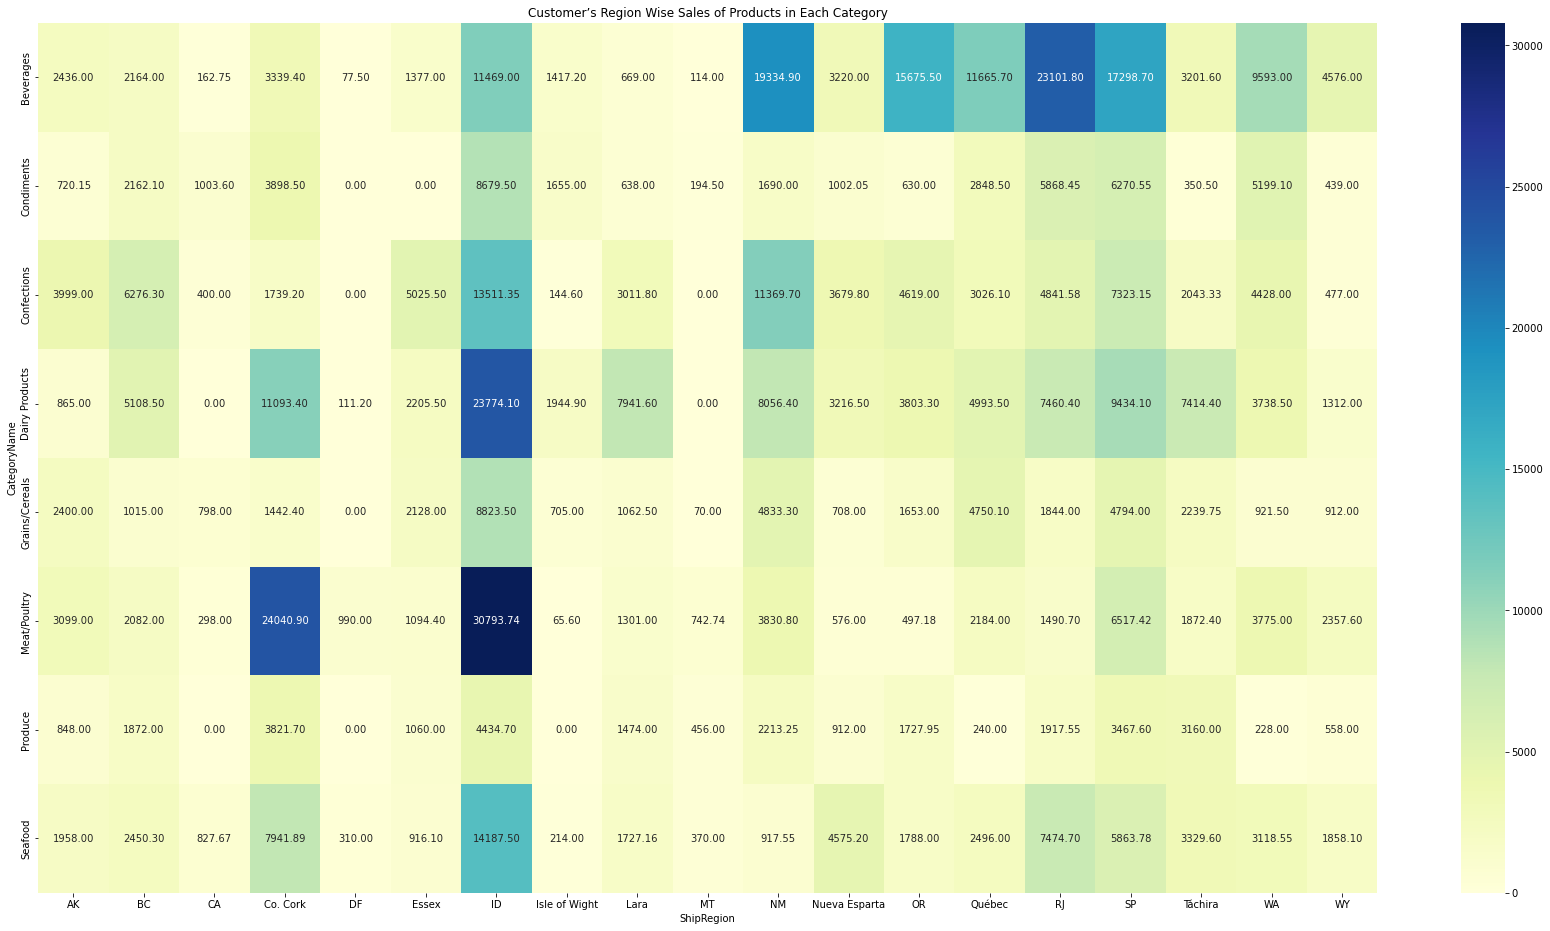

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 16))
sns.heatmap(sales_by_region_category, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Customer’s Region Wise Sales of Products in Each Category')
plt.show()


## 7. Visualize the total sales of each product, employee wise with an appropriate chart.

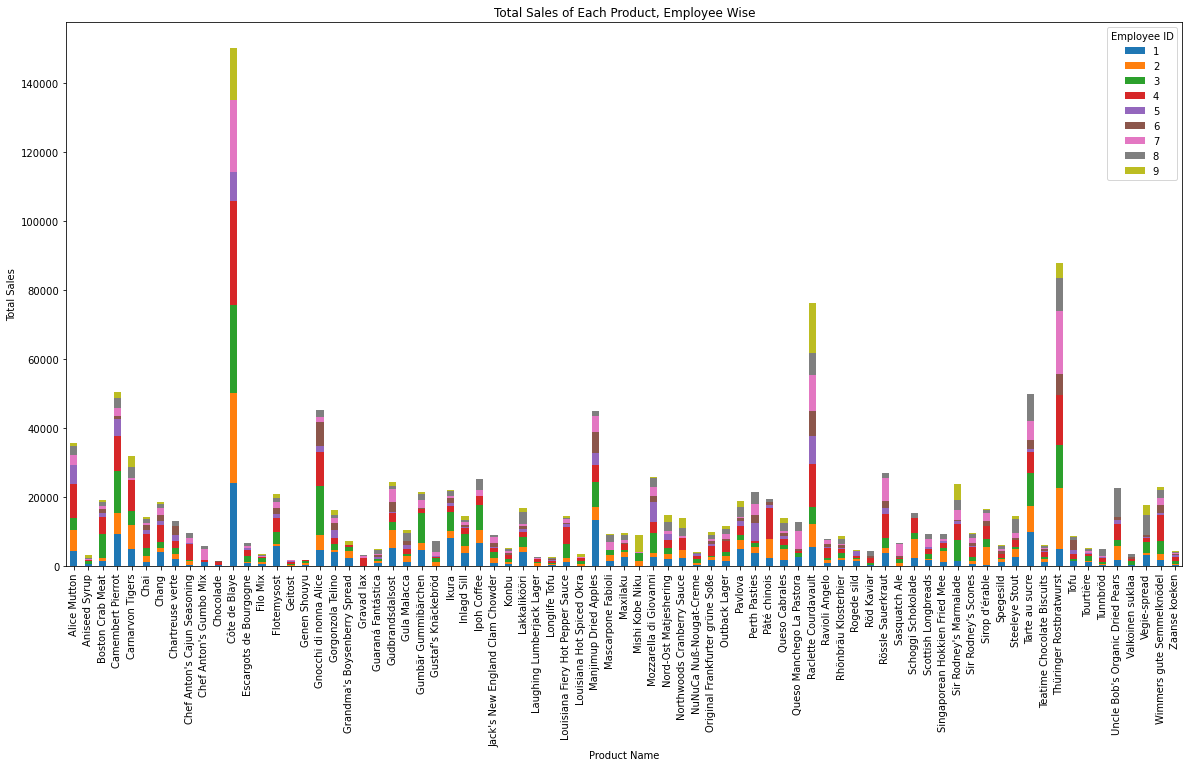

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sales_by_product_employee = df_combined.groupby(['ProductName', 'EmployeeID'])['TotalSales'].sum().unstack(fill_value=0)

sales_by_product_employee.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Total Sales of Each Product, Employee Wise')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.legend(title='Employee ID')
plt.show()


## 8. Tabulate the total sales of each product, category-wise as a percentage of the entire sales.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
total_sales_by_category = df_combined.groupby('CategoryName')['TotalSales'].sum()
total_sales = df_combined['TotalSales'].sum()

sales_by_product_category = df_combined.groupby(['ProductName', 'CategoryName'])['TotalSales'].sum().reset_index()

sales_by_product_category['Percentage'] = (sales_by_product_category['TotalSales'] / total_sales) * 100

print("Total Sales of Each Product, Category-Wise as a Percentage of the Entire Sales:")
print(sales_by_product_category)


Total Sales of Each Product, Category-Wise as a Percentage of the Entire Sales:
                        ProductName    CategoryName  TotalSales  Percentage
0                      Alice Mutton    Meat/Poultry     35482.2    2.619659
1                     Aniseed Syrup      Condiments      3080.0    0.227397
2                  Boston Crab Meat         Seafood     19048.3    1.406341
3                 Camembert Pierrot  Dairy Products     50286.0    3.712627
4                  Carnarvon Tigers         Seafood     31987.5    2.361645
..                              ...             ...         ...         ...
72  Uncle Bob's Organic Dried Pears         Produce     22464.0    1.658522
73                 Valkoinen suklaa     Confections      3510.0    0.259144
74                     Vegie-spread      Condiments     17696.3    1.306522
75        Wimmers gute Semmelknödel  Grains/Cereals     23009.0    1.698760
76                    Zaanse koeken     Confections      4358.6    0.321796

[77 row

## 9. Visualize the total sales of each product, category-wise as a percentage of the entire sales

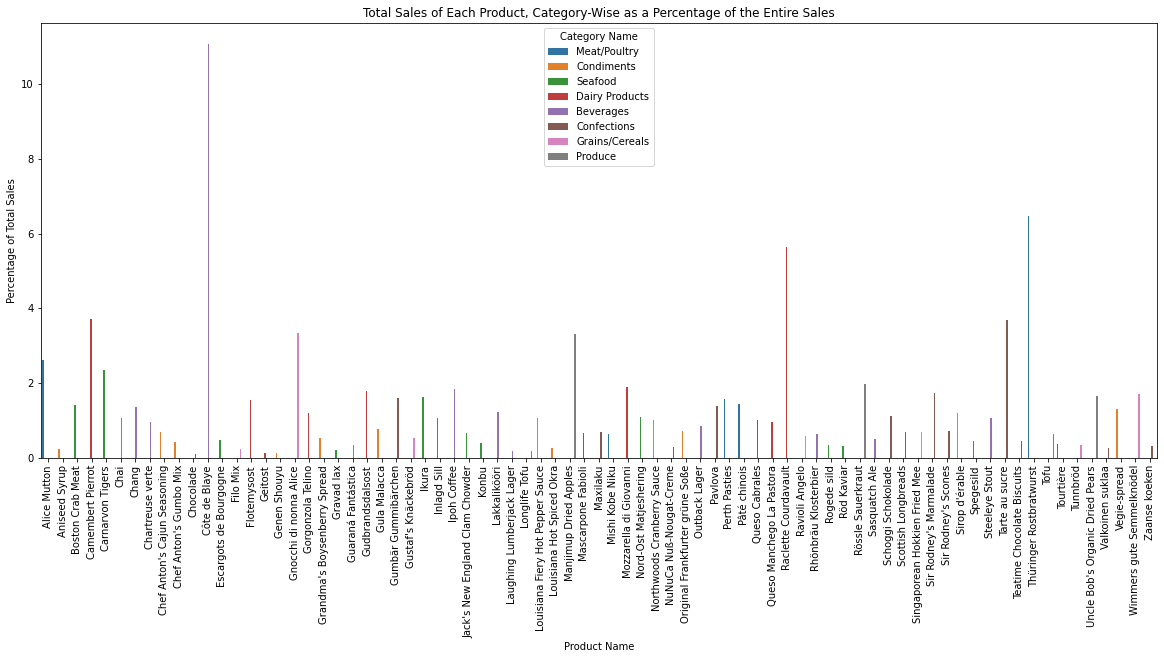

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.barplot(x='ProductName', y='Percentage', hue='CategoryName', data=sales_by_product_category)
plt.title('Total Sales of Each Product, Category-Wise as a Percentage of the Entire Sales')
plt.xlabel('Product Name')
plt.ylabel('Percentage of Total Sales')
plt.xticks(rotation=90)
plt.legend(title='Category Name')
plt.show()


## 10. Summarize the sales for each product, year wise and visualize the same in an appropriate chart

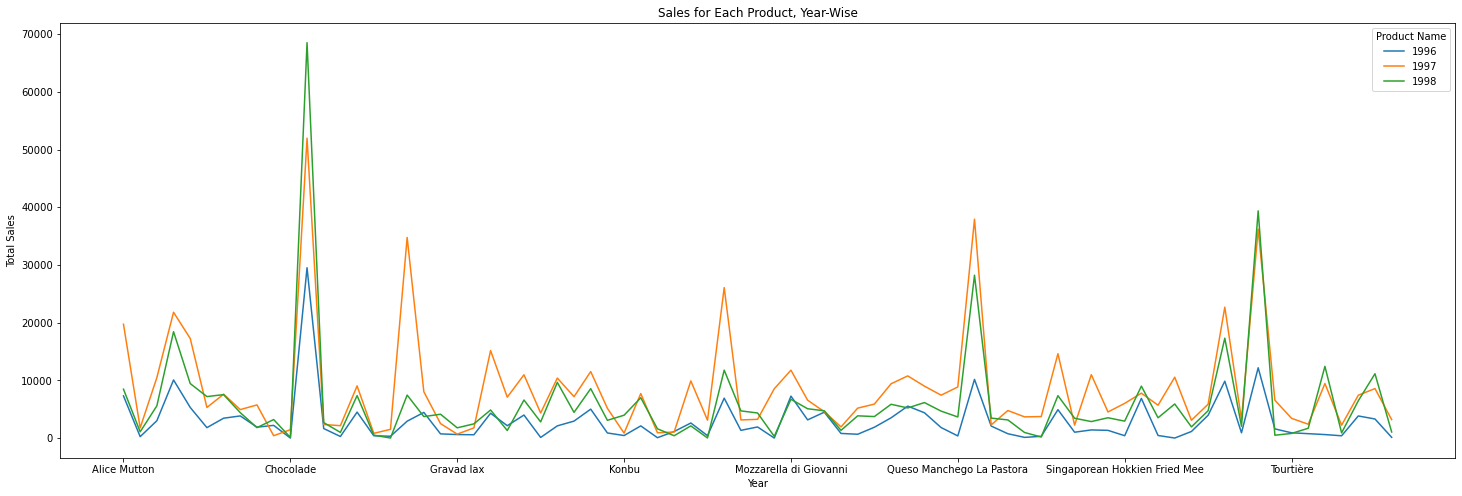

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_combined['Year'] = pd.to_datetime(df_combined['OrderDate']).dt.year


sales_by_product_year = df_combined.groupby(['ProductName', 'Year'])['TotalSales'].sum().unstack(fill_value=0)

sales_by_product_year.plot(kind='line', figsize=(25, 8))
plt.title('Sales for Each Product, Year-Wise')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Product Name')
plt.show()
